In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv(r'C:\Users\User\Desktop\data.csv')


In [23]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,city,country
0,5/2/2014 0:00,313000,3,1.50,1340,1.5,Gadag,India
1,5/2/2014 0:00,2384000,5,2.50,3650,2.0,Davangere,India
2,5/2/2014 0:00,342000,3,2.00,1930,1.0,Dharwad,India
3,5/2/2014 0:00,420000,3,2.25,2000,1.0,Bengalure,India
4,5/2/2014 0:00,550000,4,2.50,1940,1.0,Gajendragad,India


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2499 non-null   object 
 1   price        2499 non-null   int64  
 2   bedrooms     2499 non-null   int64  
 3   bathrooms    2499 non-null   float64
 4   sqft_living  2499 non-null   int64  
 5   floors       2499 non-null   float64
 6   city         2499 non-null   object 
 7   country      2499 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 156.3+ KB


In [25]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors
count,2.499000e+03,2499.000000,2499.000000,2499.000000,2499.000000
mean,5.491061e+05,3.382153,2.140956,2111.255702,1.500000
std,3.627604e+05,0.908117,0.781187,954.914771,0.541142
min,8.000000e+04,0.000000,0.000000,420.000000,1.000000
25%,3.300000e+05,3.000000,1.750000,1450.000000,1.000000
50%,4.700000e+05,3.000000,2.250000,1960.000000,1.500000
75%,6.539750e+05,4.000000,2.500000,2560.000000,2.000000
max,7.062500e+06,9.000000,8.000000,13540.000000,3.500000


In [26]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'city', 'country'],
      dtype='object')

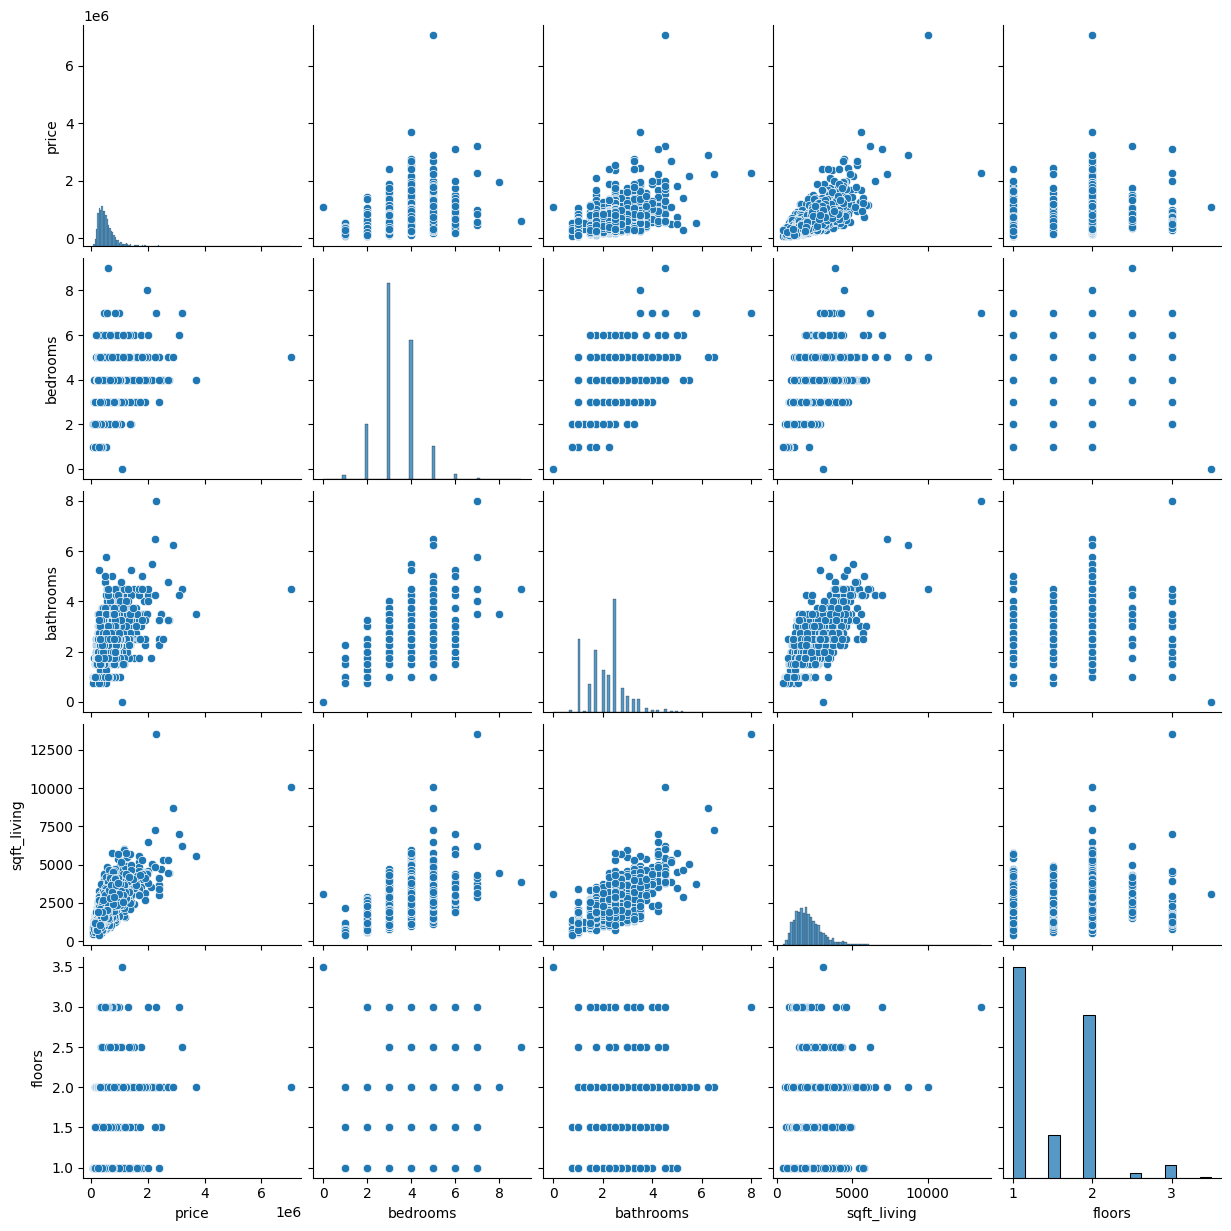

In [27]:
sns.pairplot(df)

<Axes: >

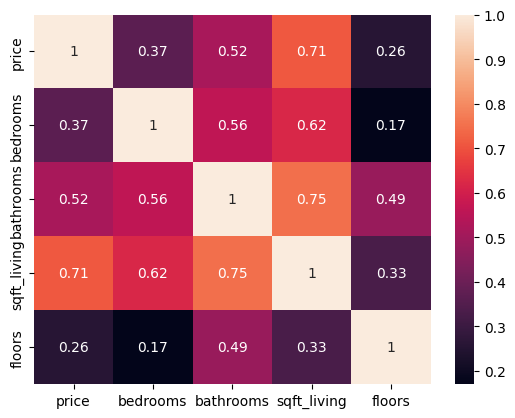

In [28]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)


In [29]:
X=df[['bedrooms', 'bathrooms', 'sqft_living', 'city', 'country', 'sqft_living', 'floors',]]
y=df['price']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [32]:
X_train

,bedrooms,bathrooms,sqft_living,city,country,sqft_living,floors
769,3,1.75,1410,Seattle,USA,1410,1.0
264,2,1.00,1010,Seattle,USA,1010,1.5
2332,4,2.50,3170,Auburn,USA,3170,2.0
1859,4,2.50,2700,Kirkland,USA,2700,2.0
1234,2,1.00,1680,Seattle,USA,1680,1.0
...,...,...,...,...,...,...,...
599,3,2.25,2450,Covington,USA,2450,1.0
1599,3,1.75,1680,Seattle,USA,1680,1.0
1361,4,2.50,1982,Kent,USA,1982,2.0
1547,5,2.00,2450,Seattle,USA,2450,1.0


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm =LinearRegression()

In [35]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])
lm.fit(X_train,  y_train)
print(lm)  


LinearRegression()


In [36]:
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])


In [37]:
coeff_df

,Coefficient
bedrooms,-75414.467674
bathrooms,-24978.392191
sqft_living,172.473322
sqft_living,172.473322
floors,20688.916514


In [38]:
predictions = lm.predict(X_test)

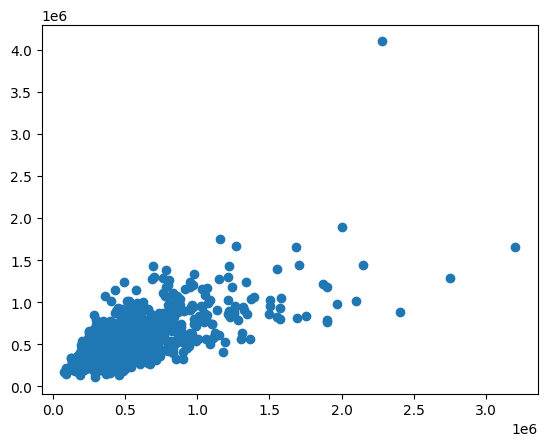

In [39]:
plt.scatter(y_test, predictions)

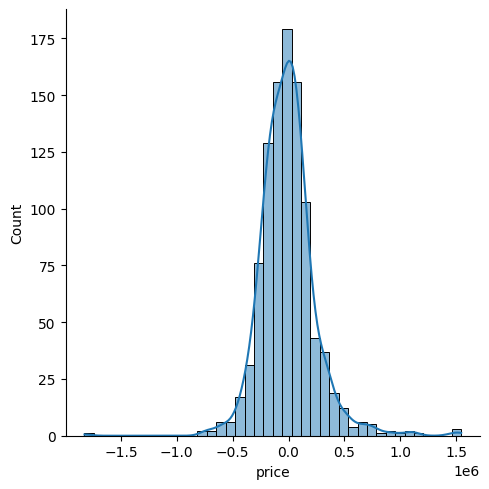

In [40]:
sns.displot((y_test - predictions), bins=40, kde=True )

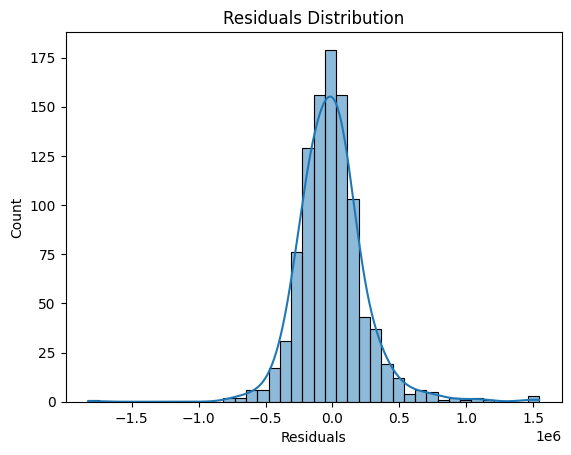

In [41]:
sns.histplot((y_test - predictions), bins=40, kde=True, kde_kws={'bw_adjust': 1.5})
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()
